<a href="https://colab.research.google.com/github/patrickdias1/Projeto-1/blob/main/PROJETO_1_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *ROMA*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Roma, e ver quais insights podem ser extraídos a partir de dados brutos.**

# ROMA

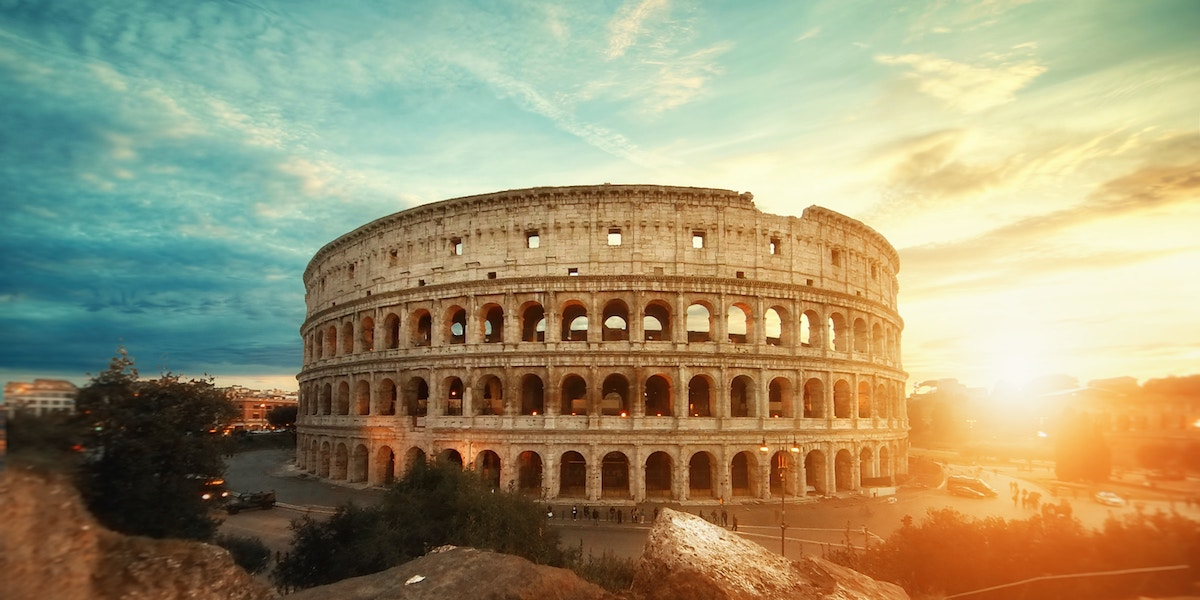

Todos os anos, a cidade de Roma atrai visitantes do mundo todo. Há quem diga que um passeio sobre as ruas da Cidade Enterna nos faz viajar no tempo. Os seus monumentos grandiosos e construções imponetes são a prova disso.

Neste caderno, veremos uma análise superficial a respeito das opções de hospedagem, via Aibnb, no Centro Histórico de Roma. Que é o local mais visitado pelos turistas que viajam a *La Città Eterna*.


## Obtenção dos Dados Para a Análise.


In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
# importar o arquivo listings.csv, da base de dados do airbnb, para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/italy/lazio/rome/2022-09-11/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**


* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias




In [3]:
# mostrar as 5 primeiras entradas do DataFrame criado.
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,103870,CASACHICA Your holiday home in Rome,535822,Fabrizio,NaN,I Centro Storico,41.89711,12.50423,Entire home/apt,78,3,225,2022-08-25,1.64,1,319,30,NaN
1,17629440,ISOLA DEL CUORE,68534156,Cristina,NaN,VII San Giovanni/Cinecittà,41.78984,12.60899,Private room,45,1,213,2022-07-12,3.22,2,343,8,NaN
2,2737,"Elif's room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.87136,12.48215,Private room,50,7,7,2015-05-28,0.07,6,365,0,NaN
3,2903,Stay a night in Calisto6 B&B Rome,3280,Andrea,NaN,I Centro Storico,41.88824,12.46953,Private room,164,1,55,2017-10-31,0.33,3,318,0,NaN
4,3079,Cozy apartment (2-4)with Colisseum view,3504,Laura,NaN,I Centro Storico,41.89500,12.49117,Entire home/apt,90,3,21,2022-04-30,0.15,4,265,2,NaN


Como mencionado acima, analisaremos apenas as opções de locação que estão disponíveis no centro histórico da cidade. Mas, antes disso, faremos uma análise geral do conteúdo dos dados que foram importados.

In [4]:
# identificando as variáveis do meu Dataframe.
df.keys()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 24782
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [6]:
# ordenar de forma decrescente as variáveis por seus valores ausentes e em porcentagem.

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100

neighbourhood_group               100.000000
license                            84.666290
reviews_per_month                  15.006860
last_review                        15.006860
host_name                           0.024211
name                                0.012106
number_of_reviews                   0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
id                                  0.000000
minimum_nights                      0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Dentre as variáveis do conjunto de dados, daremos uma atenção especial a varíavel *price*.

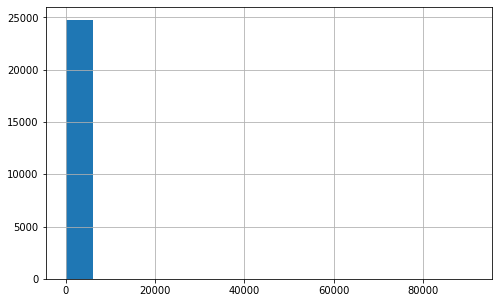

In [7]:
# plotar o histograma dos preços de locação.
df.price.hist(bins=15, figsize=(8,5));

Logo acima, podemos constatar que a distribuição dos preços encontra-se irregular e anormal, mostrando uma assimetria nos dados. Já que os mesmos, por se tratarem de um conjunto bruto, não passaram por nenhum método de tratamento.

### **Q4. Qual a média dos preços de aluguel?**

In [8]:
# ver a média da coluna `price``
df.price.mean()


172.56254539585183

A média de preços para hospedagem, considerando todas as localidades de Roma, é de € 172,7.   

Ressalta-se que os valores variam de acordo com a localização, o tipo de hospedagem e o número de noites.

### **Q5. Qual o tipo de imóvel mais requisitado no Airbnb?**

In [9]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    16584
Private room        7276
Hotel room           783
Shared room          139
Name: room_type, dtype: int64

In [10]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]*100

Entire home/apt    66.919538
Private room       29.360019
Hotel room          3.159551
Shared room         0.560891
Name: room_type, dtype: float64

Considerando todos os bairros, dentre todas as opções de aluguéis, via Aibnb,    as casas e apartamentos lideram o ranking de disponibilidade para o turista. 

Em seguida, tem-se os quartos privativos, quartos de hotéis e os quartos compartilhados.

### **Q6. Qual a localidade mais cara do dataset?**



In [11]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
XI Arvalia/Portuense          299.923990
I Centro Storico              204.945221
VII San Giovanni/Cinecittà    166.432386
II Parioli/Nomentano          151.283455
XIII Aurelia                  145.135776
XV Cassia/Flaminia            139.493151
IX Eur                        126.807018
XII Monte Verde               121.032562
XIV Monte Mario               103.512876
X Ostia/Acilia                 98.260116
VIII Appia Antica              98.121602
V Prenestino/Centocelle        93.277778
IV Tiburtina                   88.071264
III Monte Sacro                86.736181
VI Roma delle Torri            77.364706
Name: price, dtype: float64

De acordo com os dados brutos, a localidade com os imóveis mais caros de Roma, é a *XI Arvalia/Portuense*.


Agora, analisaremos os imóveis localizados no *I Centro Storico*, o local mais frequentado pelos turistas.

# **INFORMAÇÕES SOBRE O CENTRO HISTÓRICO DE ROMA**

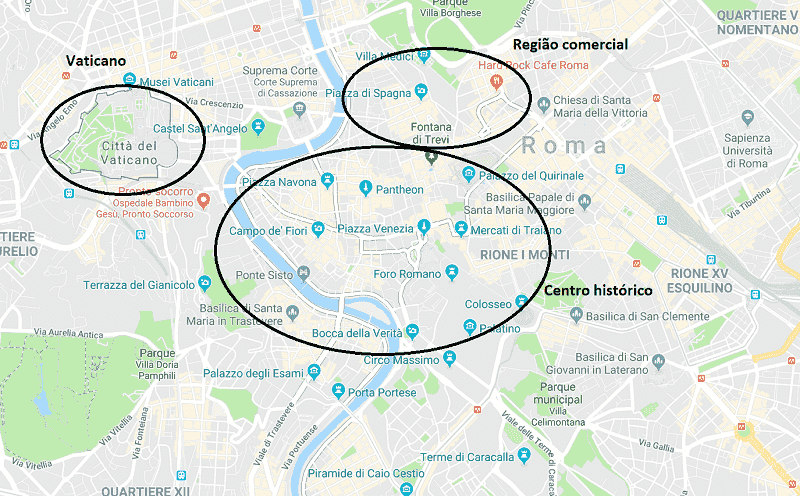

No Centro Histórico estão localizados os principais monumentos e pontos turísticos.  Um local que, segundo viajantes, pode ser explorado a pé e em poucas horas.

Alguns dos locais que podem ser visitados:

- Piazza del Popolo
- Terraza del Pincio (mirante)
- Via del Corso (com parada para almoço)
- Piazza di Spagna
- Fontana di Trevi
- Panteão
- Piazza Venezia
- Monumento a Vittorio Emanuele II
- Piazza del Campidolgio
- Teatro Marcello

O que faz desta área uma das mais procuradas, para hospedagens, pelos turistas.

# **ANALISANDO OS IMÓVEIS PARA ALUGUEL NO CENTRO HISTÓRICO DE ROMA**

Dando sequência, precisaremos delimitar um ponto de corte a fim de melhorar a acurácia de nossa análise. Para isso, na variável *price*, usaremos a média que foi calculada na (**Q4**) desse caderno.

Para este estudo, consideraremos os imóveis com quantidade miníma de reserva menores que  07 noites. 


In [12]:
# limpando os dados das variáveis price e minumun_nights.

from typing_extensions import DefaultDict
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 173].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights >7].index, axis=0, inplace=True)

FILTRANDO OS DADOS PARA ESTA LOCALIDADE


In [13]:
print(df_clean[df_clean.neighbourhood == "I Centro Storico "].shape)
df_clean[df_clean.neighbourhood == "I Centro Storico"]

(0, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,103870,CASACHICA Your holiday home in Rome,535822,Fabrizio,NaN,I Centro Storico,41.897110,12.504230,Entire home/apt,78,3,225,2022-08-25,1.64,1,319,30,NaN
3,2903,Stay a night in Calisto6 B&B Rome,3280,Andrea,NaN,I Centro Storico,41.888240,12.469530,Private room,164,1,55,2017-10-31,0.33,3,318,0,NaN
4,3079,Cozy apartment (2-4)with Colisseum view,3504,Laura,NaN,I Centro Storico,41.895000,12.491170,Entire home/apt,90,3,21,2022-04-30,0.15,4,265,2,NaN
5,11834,"Roma ""Charming Boschetto House""",44552,Serena,NaN,I Centro Storico,41.896500,12.492110,Entire home/apt,100,2,158,2022-09-04,1.14,1,325,16,NaN
9,16276,B&B Calisto6 great location in Rome,3280,Andrea,NaN,I Centro Storico,41.890070,12.471220,Private room,164,1,6,2015-06-18,0.04,3,359,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24194,710811689797582785,LUX ME - Suite Deluxe in Heart of Trastevere,452011552,Massimiliano,NaN,I Centro Storico,41.888760,12.471467,Private room,109,2,0,NaN,NaN,5,145,0,NaN
24195,710889195218753387,Piccolo Appartamento nel cuore vivo della città!,296234794,Vanessa,NaN,I Centro Storico,41.898084,12.472004,Entire home/apt,120,1,0,NaN,NaN,4,339,0,17695
24199,711360888929251178,At Home Colosseo,104614542,Giovanni,NaN,I Centro Storico,41.888249,12.501384,Entire home/apt,130,2,0,NaN,NaN,6,337,0,NaN
24211,711545939433225407,Holidays House city center,446695149,Paris,NaN,I Centro Storico,41.901806,12.493523,Entire home/apt,51,2,0,NaN,NaN,1,280,0,NaN


PLOTANDO UM HISTOGRAMA DA VARIÁVEL *PRICE* NO CENTRO HISTÓRICO DE ROMA.

---



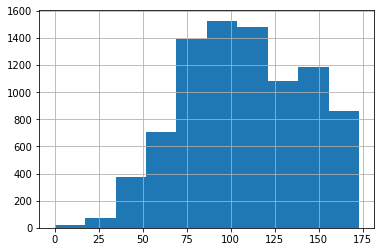

In [14]:
df_clean.loc[df["neighbourhood"] == "I Centro Storico"]["price"].hist()

VERIFICANDO OS TIPOS DE QUARTO CADASTRADOS NESTA LOCALIDADE.

In [15]:
df_clean.loc[df_clean["neighbourhood"] == "I Centro Storico"]["room_type"].value_counts()

Entire home/apt    5517
Private room       2811
Hotel room          347
Shared room          36
Name: room_type, dtype: int64

## Conclusões


Nesta análise superficial, podemos constatar que, no Centro Histórico de Roma, há aproximadamente 9 mil formas de hospedagem cadastradas no site da Airbnb. Considerando as condições de corte que foram propostas nesse caderno de estudo: minimum_nights < 7 e price < €173. 

A categoria de casas/apartamentos(Entire home/apt), cadastrados no Airbn, nesta localidade, lideram o número de opções disponíveis para hospedagem de turistas.

Neste estudo, não considerou-se a possibilidade do mesmo imóvel ter sido cadastrado duas vezes ou com cadastros de anfitriões diferentes. O que pode ser objeto de pesquisa para futuras análises. Pois o número de opções de hospedagens disponíveis pode não corresponder a quantidade de imóveis existentes.